# Regiones con PCA

Intentemos ver si sale algo de aplicar PCA a la matriz de ocurrencias

In [1]:
%pylab inline

import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [2]:
df = pd.DataFrame.from_csv("/home/jmperez/Downloads/cantidadesTotalesOrdenada.csv")

/home/jmperez/.pyenv/versions/2.7.12/envs/tesis-damian/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  """Entry point for launching an IPython kernel.


In [3]:
df.columns

Index([u'buenosairesPalabras', u'catamarcaPalabras', u'chacoPalabras',
       u'chubutPalabras', u'cordobaPalabras', u'corrientesPalabras',
       u'entreriosPalabras', u'formosaPalabras', u'jujuyPalabras',
       u'lapampaPalabras', u'lariojaPalabras', u'mendozaPalabras',
       u'misionesPalabras', u'neuquenPalabras', u'rionegroPalabras',
       u'saltaPalabras', u'sanjuanPalabras', u'sanluisPalabras',
       u'santacruzPalabras', u'santafePalabras', u'santiagoPalabras',
       u'tierradelfuegoPalabras', u'tucumanPalabras', u'cantPalabra',
       u'buenosairesUsuarios', u'catamarcaUsuarios', u'chacoUsuarios',
       u'chubutUsuarios', u'cordobaUsuarios', u'corrientesUsuarios',
       u'entreriosUsuarios', u'formosaUsuarios', u'jujuyUsuarios',
       u'lapampaUsuarios', u'lariojaUsuarios', u'mendozaUsuarios',
       u'misionesUsuarios', u'neuquenUsuarios', u'rionegroUsuarios',
       u'saltaUsuarios', u'sanjuanUsuarios', u'sanluisUsuarios',
       u'santacruzUsuarios', u'santafeUsuari

In [4]:
cant_palabras = df.columns[:23]

cant_usuarios = df.columns[24:-1]

cant_usuarios

Index([u'buenosairesUsuarios', u'catamarcaUsuarios', u'chacoUsuarios',
       u'chubutUsuarios', u'cordobaUsuarios', u'corrientesUsuarios',
       u'entreriosUsuarios', u'formosaUsuarios', u'jujuyUsuarios',
       u'lapampaUsuarios', u'lariojaUsuarios', u'mendozaUsuarios',
       u'misionesUsuarios', u'neuquenUsuarios', u'rionegroUsuarios',
       u'saltaUsuarios', u'sanjuanUsuarios', u'sanluisUsuarios',
       u'santacruzUsuarios', u'santafeUsuarios', u'santiagoUsuarios',
       u'tierradelfuegoUsuarios', u'tucumanUsuarios'],
      dtype='object')

In [5]:
from scipy.stats import entropy


df["cantProvincias"] = (df[cant_palabras] > 0).sum(axis=1)
df["entropy"] = df[cant_palabras].apply(entropy, axis=1, raw=True)

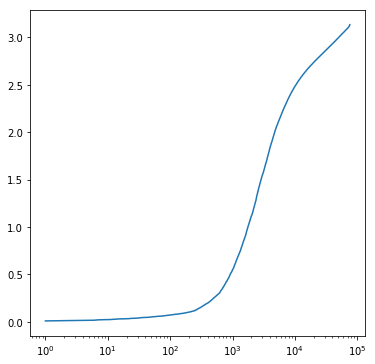

In [84]:
from sklearn import decomposition


plt.rcParams['figure.figsize'] = (6, 6)

umbral = 40
componentes = 7
min_provincias = 2

df_muy_usadas = df.loc[(df.cantPalabra > umbral) & (df.cantProvincias >= min_provincias)].copy()
df_muy_usadas.sort_values(by="entropy", ascending=True, inplace=True)

semilogx(range(df_muy_usadas.shape[0]), df_muy_usadas.entropy.as_matrix())

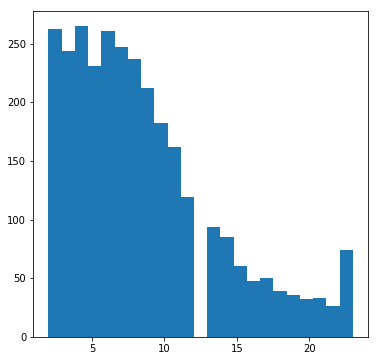

In [89]:
plt.rcParams['figure.figsize'] = (6, 6)
limite = 3* 10 ** 3
hist(df_muy_usadas[:limite].cantProvincias, bins=23);

In [90]:

plt.rcParams['figure.figsize'] = (6, 6)

pca = decomposition.PCA(n_components=componentes)

X = df_muy_usadas[cant_palabras][:limite].as_matrix()
print(X.shape)
pca.fit(X)


(3000, 23)


PCA(copy=True, iterated_power='auto', n_components=7, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

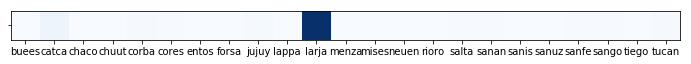

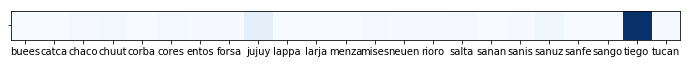

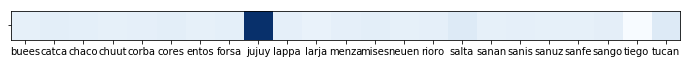

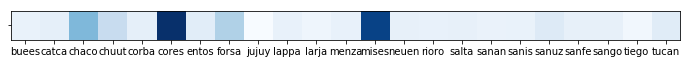

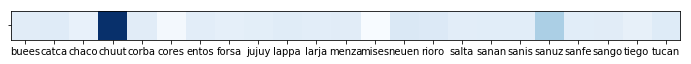

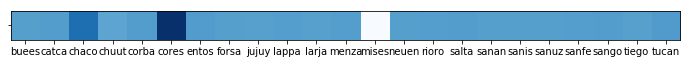

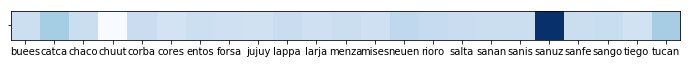

In [93]:
prov_labels = [x.split("P")[0] for x in cant_palabras]
prov_labels = [x[:3] + x[-2:] for x in prov_labels]

plt.rcParams['figure.figsize'] = (12, 15)
no_comp = len(pca.components_)

for i, component in enumerate(pca.components_):
    plt.subplot(no_comp, 1, i+1)
    
    plt.imshow(component.reshape(1, -1), cmap=plt.cm.Blues)
    plt.xticks(range(23), prov_labels)
    plt.yticks(range(1), [''])
    plt.show()
    

In [94]:
for i, component in enumerate(pca.components_):
    print("="*40)
    print("componente {}\n\n".format(i+1))
    x = pd.Series(component, index=prov_labels)
    
    print(x.sort_values(ascending=False))
        

componente 1


larja    0.998710
catca    0.045979
jujuy    0.011854
tucan    0.009404
corba    0.008584
sanan    0.006675
salta    0.006065
sango    0.005132
cores    0.003794
sanfe    0.003718
mises    0.002799
sanuz    0.002466
lappa    0.002045
menza    0.001555
buees    0.001146
chaco    0.000970
sanis    0.000872
chuut    0.000808
neuen    0.000475
forsa    0.000438
entos    0.000244
rioro   -0.000544
tiego   -0.000887
dtype: float64
componente 2


tiego    0.995209
jujuy    0.085306
sanuz    0.035418
chuut    0.021198
cores    0.012064
salta    0.008461
tucan    0.008333
mises    0.008327
chaco    0.007687
forsa    0.007090
rioro    0.005564
sanis    0.004500
entos    0.003948
neuen    0.003788
corba    0.003094
lappa    0.002652
sanfe    0.001942
catca    0.001929
sango    0.001868
buees    0.001833
menza    0.000300
sanan   -0.000127
larja   -0.000586
dtype: float64
componente 3


jujuy    0.992379
salta    0.054270
tucan    0.048167
catca    0.022346
cores    0.021031
mises  